In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

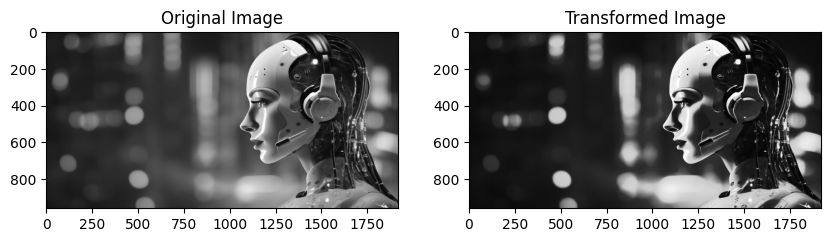

In [2]:
# Load the image and convert it to grayscale
Iin = Image.open('ai.jpeg').convert('L')
Iin = np.array(Iin)

# Parameters for piecewise transformation
S1 = 50    # Example value for S1
S2 = 200   # Example value for S2
r1 = 100   # Example value for r1
r2 = 150   # Example value for r2

# Pre-allocate output image
Iout = np.zeros_like(Iin, dtype=np.uint8)

# Coefficients for the piecewise linear transformation
a_l1 = S1 / r1
a_l2 = (S2 - S1) / (r2 - r1)
b_l2 = S1 - a_l2 * r1
a_l3 = (255 - S2) / (255 - r2)
b_l3 = S2 - a_l3 * r2

# Apply the transformation
for i in range(Iin.shape[0]):
    for j in range(Iin.shape[1]):
        r = Iin[i, j]
        if r <= r1:
            S = a_l1 * r
        elif r <= r2:
            S = a_l2 * r + b_l2
        else:
            S = a_l3 * r + b_l3
        Iout[i, j] = np.clip(S, 0, 255)  # Ensure the values are within [0, 255]

# Display the original and transformed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(Iin, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Transformed Image')
plt.imshow(Iout, cmap='gray')

plt.show()
